# Лабораторная работа №3

## Подготовка обучающей и тестовой выборки, кросс-валидация и подбор гиперпараметров на примере метода ближайших соседей

**Цель лабораторной работы**: изучение способов подготовки выборки и подбора гиперпараметров на примере метода ближайших соседей.

* Выберите набор данных (датасет) для решения задачи классификации или регрессии.
* С использованием метода train_test_split разделите выборку на обучающую и тестовую.
* Обучите модель ближайших соседей для произвольно заданного гиперпараметра K. Оцените качество модели с помощью подходящих для задачи метрик.
* Произведите подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оцените качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
* Сравните метрики качества исходной и оптимальной моделей.

### Выбор набора данных

После многочисленных неудачных попыток использования opensource наборов данных, для выполнения данной лабораторной работы был выбран достаточно тривиальный датасет iris_dataset. Неудачные попытки были связанны с неоднородностью значений в наборах данных, которые никак не получалось нормализовать.

In [107]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.datasets import *

pd.set_option('display.max_columns', None)

In [108]:
# чтение набора днанных
data = load_iris()

pd_data = pd.DataFrame(data=np.c_[data['data'], data['target']], columns=data['feature_names']+['target'])

# data0 = pd.read_csv('JupyterNotebooks/data/googleplaystore.csv', sep=",")
# data1 = pd.read_csv('JupyterNotebooks/data/superhero.csv', sep=",")

In [109]:
pd_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


### Разделение набора данных на обущающую и тестовую

In [117]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.2)

In [111]:
print(f"Обучающая выборка (x, y): ( {X_train.shape}, {Y_train.shape} )")
print(f"Тестовая выборка (x, y): ( {Y_test.shape}, {Y_train.shape} )")

Обучающая выборка (x, y): ( (120, 4), (120,) )
Тестовая выборка (x, y): ( (30,), (120,) )


### Обучение модели ближайших соседей (с заданным К)

In [118]:
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
KNC = KNeighborsClassifier(n_neighbors=3)

In [119]:
KNC.fit(X_train, Y_train)
predict1 = KNC.predict(X_test)

In [120]:
# Предсказанные значения тестовой выборки
predict1

array([1, 1, 2, 0, 1, 2, 0, 2, 1, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 0, 0, 2,
       1, 2, 0, 0, 1, 1, 0, 0])

### Оценка качества модели

Оценим качества обученной модели при помощи различных оценочных метрик.

**Accuracy**

In [121]:
# метрика Accuracy - процент совпадения предсказаний и истинных значений
from sklearn.metrics import accuracy_score, balanced_accuracy_score

accuracy_result = accuracy_score(Y_test, predict1) * 100
print(f"Процент совпадений: {round(accuracy_result, 3)}")

Процент совпадений: 96.667


**Confusion matrix**

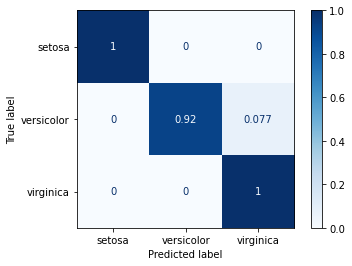

In [122]:
# Матрица ошибок
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

confusion_matrix(Y_test, predict1, labels=[0, 1, 2])
plot_confusion_matrix(KNC, X_test, Y_test, 
                      display_labels=data.target_names, 
                      cmap=plt.cm.Blues, normalize='true')

**Recall, Precision**

In [123]:
from sklearn.metrics import recall_score, precision_score


rcl1 = recall_score(Y_test, predict1, average='micro')
rcl2 = recall_score(Y_test, predict1, average='macro')
rcl3 = recall_score(Y_test, predict1, average='weighted')

prc1 = precision_score(Y_test, predict1, average='micro')
prc2 = precision_score(Y_test, predict1, average='macro')
prc3 = precision_score(Y_test, predict1, average='weighted')

In [124]:
print(f"Recall (сумма по всем классам): {round(rcl1, 4)}")
print(f"Recall (среднее значение от расчетов по классам в отдельности): {round(rcl2, 4)}")
print(f"Recall (с учетом веса): {round(rcl3, 4)}")

Recall (сумма по всем классам): 0.9667
Recall (среднее значение от расчетов по классам в отдельности): 0.9744
Recall (с учетом веса): 0.9667


In [125]:
print(f"Precision (сумма по всем классам): {round(prc1, 4)}")
print(f"Precision (среднее значение от расчетов по классам в отдельности): {round(prc2, 4)}")
print(f"Precision (с учетом веса): {round(prc3, 4)}")

Precision (сумма по всем классам): 0.9667
Precision (среднее значение от расчетов по классам в отдельности): 0.9524
Precision (с учетом веса): 0.9714


### Подбор гиперпараметра К

Ранее я произвольно установил гиперпараметр К равным 3. Теперь же осознанно подберем значение параметра различными методами

**Grid search**

In [126]:
# Сформируем массив возможных параметров для модели k ближайших соседей:
n_range = np.array(range(3, 55, 3))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
         54])}]

In [127]:
# GridSearchCV
from sklearn.model_selection import GridSearchCV

KNC_GS = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=3, scoring = 'accuracy')
# параметр cv как раз указыватет на использование кросс-валидации
KNC_GS.fit(X_train, Y_train)

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       54])}],
             scoring='accuracy')

In [128]:
# результаты выполнения:
print(f"Лучшее значение гиперпараметра: {KNC_GS.best_params_}")
print(f"Лучший итог по выбранной метрике: {KNC_GS.best_score_}")

Лучшее значение гиперпараметра: {'n_neighbors': 3}
Лучший итог по выбранной метрике: 0.9666666666666668


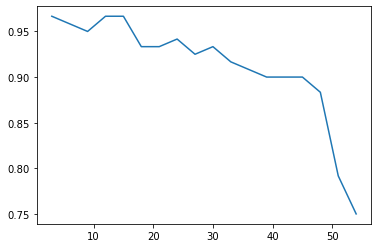

In [129]:
# График для всех вариантов параметра К
plt.plot(n_range, KNC_GS.cv_results_['mean_test_score'])

Лучшее значение гиперпараметра: {'n_neighbors': 18}
Лучший итог по выбранной метрике: 0.975


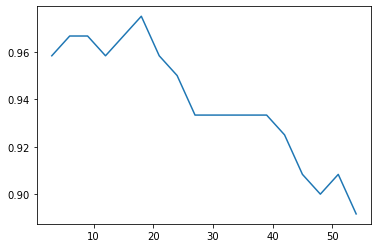

In [130]:
from sklearn.model_selection import LeaveOneOut

KNC_GS1 = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=LeaveOneOut(), scoring = 'accuracy')

KNC_GS1.fit(X_train, Y_train)

# результаты выполнения:
print(f"Лучшее значение гиперпараметра: {KNC_GS1.best_params_}")
print(f"Лучший итог по выбранной метрике: {KNC_GS1.best_score_}")

# График для всех вариантов параметра К
plt.plot(n_range, KNC_GS1.cv_results_['mean_test_score'])

**Randomized Search**

In [131]:
# Другой метод кроссвалидации
from sklearn.model_selection import RandomizedSearchCV

KNC_RS = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=3, scoring = 'accuracy')
# параметр cv как раз указыватет на использование кросс-валидации

# X_train, X_test, Y_train, Y_test = train_test_split(data.data, data.target, test_size=0.5, random_state=1)

KNC_RS.fit(X_train, Y_train)

RandomizedSearchCV(cv=3, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33, 36, 39, 42, 45, 48, 51,
       54])}],
                   scoring='accuracy')

In [133]:
# результаты выполнения:
print(f"Лучшее значение гиперпараметра: {KNC_RS.best_params_}")
print(f"Лучший итог по выбранной метрике: {round(KNC_RS.best_score_, 4)}")

Лучшее значение гиперпараметра: {'n_neighbors': 15}
Лучший итог по выбранной метрике: 0.9667


### Сравнение матрик качества исходной и оптимальной моделей

In [134]:
print(f"Метрика для оптимальной модели: {KNC_RS.best_score_}")
print(f"Метрика для исходной модели: {round(accuracy_score(Y_test, predict1) * 100, 4)}")

Метрика для оптимальной модели: 0.9666666666666667
Метрика для исходной модели: 96.6667


для выполнения данной лабораторной работы был выбран не самый удачных "учебный" датасет, который достаточно предсказуем.